# Day 15 Group Worksheet - Solutions
Oct 27, 2025

If you're working on CoCalc, it's good to rename your notebook with a fun group name and to include your names below so that you can easily find it later for reference.

* Group members:

## *Plinko*

Plinko is a game from the game show The Price is Right where a puck is placed into the top of a board with pegs in it. As the puck falls down the board, it hits the pegs and shifts to the right or the left with equal probability. Traditionally, If the puck hits the edge of the board, a bumper pushes it back to the last spot again. There are buckets at the bottom of the board for the puck to fall into with various prizes. But you can also play Plinko with a triangular board so the puck can never fall out 

## *Task 1: Triangular Plinko*

![Triangular Plinko](https://i.ibb.co/28pGMgb/triangular-plinko.png)

Use a Monte-Carlo simulation to simulate what happens on a Triangular Plinko board with 9 buckets, as shown above (image captured from https://phet.colorado.edu/sims/html/plinko-probability/latest/plinko-probability_en.html). 
1. Create a final bar chart (`plt.bar()`) or histogram (`plt.hist()`) that shows how many times the puck falls into each of the final bins. See some example code for each type of chart below.
2. As a comparison to your random data, add the expected results to your plot., which should be based on binomial distribution.

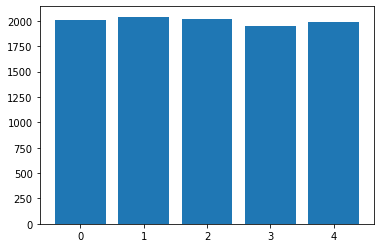

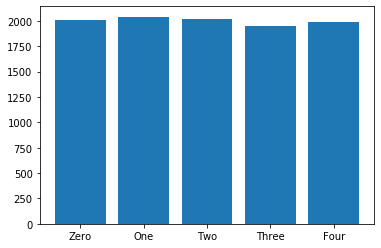

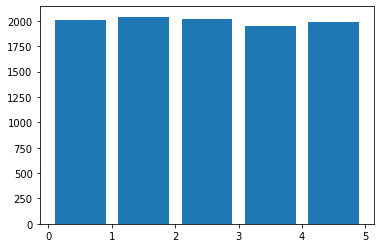

In [1]:
# Bar chart and histogram examples
import numpy as np
import matplotlib.pyplot as plt

# 10,000 random numbers from 0-4, inclusive
randos = np.random.randint(0, 5, size=10000)

### Plot 1: Bar chart

# Find out how many counts happened for each value 0-4
bins, counts = np.unique(randos, return_counts=True)

# Bar chart with
# - bins specifying the names of each bin
# - counts specifying how tall the bar should be for each bin
plt.bar(bins, counts)
plt.show()

### Plot 2: Bar chart with string names

bin_names = ['Zero', 'One', 'Two', 'Three', 'Four']
plt.bar(bin_names, counts)
plt.show()

### Plot 3: Histogram with bins specified

# In a histogram, bins are defined by the intervals between the edeges. Convetion:
#  • [left, right) - includes the left edge, excludes the right edge
#  • Exception: The rightmost bin is [left, right] - closed on both ends
# So we need to include bin edges out to 5, e.g., 'bins=range(6)'

plt.hist(randos, bins=range(6), rwidth=0.8)
plt.show()

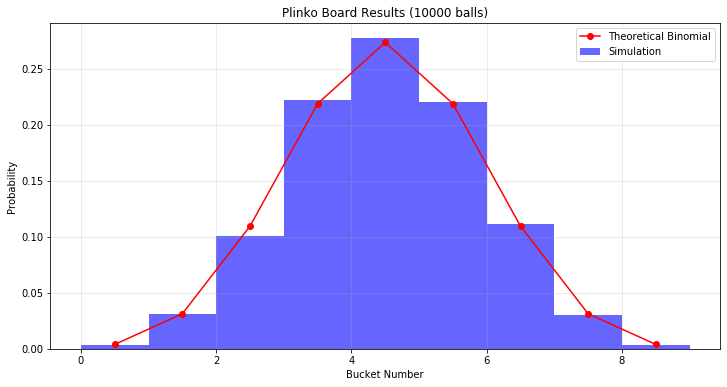

In [2]:
### Histogram solution based on one produced by Claude

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def simulate_single_ball():
    """
    Simulate a single ball's path through the Plinko board.
    For 9 buckets, we need 8 rows of pins.
    At each pin, the ball has a 50/50 chance of going left or right.
    """
    position = 0
    for i in range(8):  # 8 rows for 9 buckets
        # 0 means go left, 1 means go right
        position += np.random.choice([0, 1])
    return position

def run_simulation(num_balls=10000):
    """
    Run the Plinko simulation for a specified number of balls
    """
    results = []
    for i in range(num_balls):
        results.append(simulate_single_ball())
    return results

# Run simulation
num_balls = 10000
results = run_simulation(num_balls)

# Create histogram of results
plt.figure(figsize=(12, 6))

# Plot simulation results
plt.hist(results, bins=range(10), density=True, alpha=0.6, color='blue', label='Simulation')

# Calculate and plot theoretical binomial distribution
x = np.arange(9) # 0-8: 9 bins
n = 8  # number of rows of pins - this is number of "trials", which means the
       # number of decisions that has to be made (one decision per row)
p = 0.5  # probability of going right
theoretical = binom.pmf(x, n, p)
plt.plot(x + 0.5, theoretical, 'ro-', label='Theoretical Binomial')

plt.title(f'Plinko Board Results ({num_balls} balls)')
plt.xlabel('Bucket Number')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

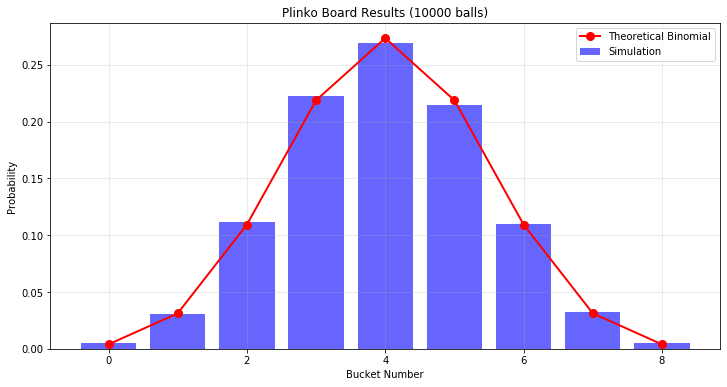

In [3]:
### Bar chart version of the solution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def simulate_single_ball():
    """
    Simulate a single ball's path through the Plinko board.
    For 9 buckets, we need 8 rows of pins.
    At each pin, the ball has a 50/50 chance of going left or right.
    """
    position = 0
    for i in range(8):  # 8 rows for 9 buckets
        # 0 means go left, 1 means go right
        position += np.random.choice([0, 1])
    return position

def run_simulation(num_balls=10000):
    """
    Run the Plinko simulation for a specified number of balls
    """
    results = []
    for i in range(num_balls):
        results.append(simulate_single_ball())
    return results

# Run simulation
num_balls = 10000
results = run_simulation(num_balls)

# Create plot
plt.figure(figsize=(12, 6))

# Count occurrences in each bucket and calculate probabilities
unique, counts = np.unique(results, return_counts=True)
probabilities = counts / num_balls

# Plot simulation results as bar chart
plt.bar(unique, probabilities, alpha=0.6, color='blue', label='Simulation', width=0.8)

# Calculate and plot theoretical binomial distribution
x = np.arange(9)  # 0-8: 9 bins
n = 8  # number of rows of pins - this is number of "trials", which means the
       # number of decisions that has to be made (one decision per row)
p = 0.5  # probability of going right
theoretical = binom.pmf(x, n, p)
plt.plot(x, theoretical, 'ro-', label='Theoretical Binomial', linewidth=2, markersize=8)

plt.title(f'Plinko Board Results ({num_balls} balls)')
plt.xlabel('Bucket Number')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

## *Task 2: Rectangular Plinko, with bumpers*
In The Price is Right version of Plinko, the board is rectangular in shape, with 9 possible start positions and 9 buckets. It uses bumpers on the walls so that for certain positions along the wall, the puck only has one choice of path instead of two, as shown below (image captured from https://games.washingtonpost.com/games/price-is-right-plinko)

![Plinko](https://i.ibb.co/sqqpg9G/plinko.png)

There are 9 possible starting positions, based on the spaces in-between adjacent pegs in the top row, and the left-most or right-most pegs and the wall. After passing through this first row of pegs (where no randomness has yet happened), the puck will encounter 12 subsequent rows of pegs where randomness will occur.

Build your Monte-Carlo simulation so that you can choose any starting position and then run $N$ simulations:

1. Create a final bar graph of histogram showing how many times the puck falls into each bin. Show the results for at least three different starting positions. 
   * Alternatively, build a heat map showing the frequency at which the puck falls into each final bin, based on the starting bin
2. Calculate the expectation value (average winnings) for each possible starting position. Express this using a visualization or print statements.

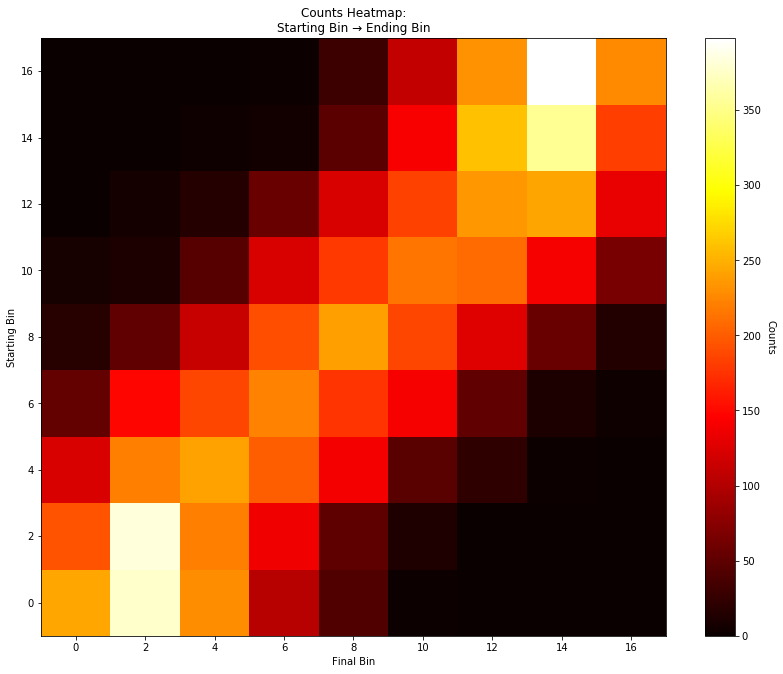

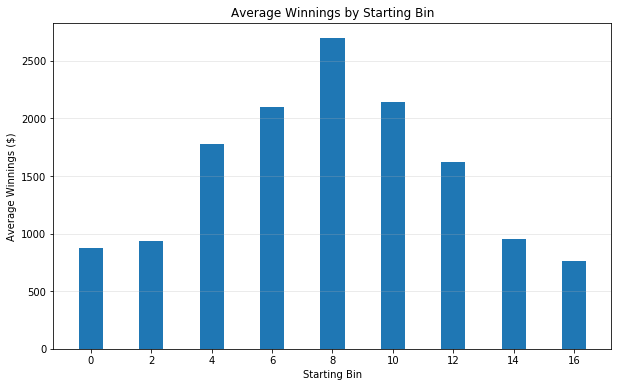

In [4]:
"""
This solution uses even bin numbers 0-16 to represent the rows with 9 bins
and odd bin numbers 1-15 to represent the rows with 8 bins. This allows us to use 
the +1:left and -1:right rules for our random numbers when the 9 bin and 8 bin
rows are each offset by half a bin from each other. 
"""
import numpy as np
import matplotlib.pyplot as plt

##############################################################################
# FINAL BIN CONFIGURATION (where balls land and their bucket values)
##############################################################################
# Even bin positions:  0    2     4     6      8     10    12    14   16
# Array index:         0    1     2     3      4      5     6     7    8
# Bucket values ($):
final_bins =     [  0,   2,    4,   6,     8,   10,   12,   14,  16]
bucket_values =  [100, 500, 1000,  0, 10000,    0, 1000,  500, 100]

##############################################################################
# STARTING BIN CONFIGURATION (where we drop balls from)
##############################################################################
starting_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16]  # All even starting positions

##############################################################################
# SIMULATION PARAMETERS
##############################################################################
n_events = 1000
num_rows = 12  # Must be even!

def bin_to_index(bin_num):
    """
    Convert even bin number (0, 2, 4, ..., 16) to array index (0, 1, 2, ..., 8)
    """
    return bin_num // 2

def index_to_bin(index):
    """
    Convert array index (0, 1, 2, ..., 8) to even bin number (0, 2, 4, ..., 16)
    """
    return index * 2

def simulate_single_ball(start_bin, num_rows=12):
    """
    Simulate a single ball's path through the Plinko board.
    
    Parameters:
    - start_bin: The starting bin position (must be even: 0, 2, 4, 6, 8, 10, 12, 14, 16)
    - num_rows: Number of rows the ball will travel through
    
    The ball alternates between even bins (0, 2, ..., 16) and odd bins (1, 3, ..., 15).
    After an even number of rows, the ball is in an even bin.
    """
    position = start_bin
    
    for row in range(num_rows):
        # Check current position parity
        if position % 2 == 0: # Even bin 0-16
            if position == 0:
                position = 1  # Can only go right
            elif position == 16:
                position = 15  # Can only go left
            else:
                position += np.random.choice([-1, 1])
        else: # Odd bin 1-15
            position += np.random.choice([-1, 1])
       
    return position

def run_simulation(start_bin, num_balls=10000, num_rows=12):
    """
    Run the Plinko simulation for a specified number of events
    """
    # Verify num_rows is even, otherwise we will end in odd bins
    if num_rows % 2 != 0:
        raise ValueError(f"num_rows must be even! Got {num_rows}")
    
    # Create empty results array
    results = np.zeros(n_events, dtype=int)
    
    for i in range(n_events):
        final_bin = simulate_single_ball(start_bin, num_rows)
        results[i] = final_bin
    
    return results

def calculate_winnings(results):
    """
    Calculate total winnings from simulation results.
    Results contains final bin numbers; we look up their bucket values.
    """
    total = 0
    for final_bin in results:
        index = bin_to_index(final_bin)
        total += bucket_values[index]
    return total

# Prepare to store results - shape: (num_starting_bins, n_events)
all_results = np.zeros((len(starting_bins), n_events), dtype=int)
all_sim_winnings = np.zeros(len(starting_bins))

# Run the simulation and store results
for start_idx, start_bin in enumerate(starting_bins):
    results = run_simulation(start_bin, n_events, num_rows)
    all_results[start_idx, :] = results
    all_sim_winnings[start_idx] = calculate_winnings(results) / n_events
    
# Heatmap comparing start bin to end bin
plt.figure(figsize=(14, 11))
heatmap_data = np.zeros((len(starting_bins), len(final_bins)))

for start_idx in range(len(starting_bins)):
    results = all_results[start_idx, :]
    for final_idx in range(len(final_bins)):
        final_bin = final_bins[final_idx]
        count = np.sum(results == final_bin)
        heatmap_data[start_idx, final_idx] = count

im = plt.imshow(heatmap_data, cmap='hot', aspect='auto', origin='lower')
plt.xticks(range(len(final_bins)), final_bins)
plt.yticks(range(len(starting_bins)), starting_bins)
plt.xlabel('Final Bin')
plt.ylabel('Starting Bin')
plt.title('Counts Heatmap:\nStarting Bin → Ending Bin')
cbar = plt.colorbar(im)
cbar.set_label('Counts', rotation=270, labelpad=15)
plt.show()

# Bar chart showing average winnings for each starting bin
plt.figure(figsize=(10, 6))
plt.bar(starting_bins, all_sim_winnings)
plt.xlabel('Starting Bin')
plt.ylabel('Average Winnings ($)')
plt.title('Average Winnings by Starting Bin')
plt.xticks(starting_bins)
plt.grid(True, alpha=0.3, axis='y')
plt.show()